# Ejercicio Final PYTHON Mario Álvarez Gómez
## Contexto
El Informe Mundial de la Felicidad es una encuesta histórica sobre el estado de la felicidad global. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la actualización de 2016. El World Happiness 2017, que clasifica a 155 países según sus niveles de felicidad, se lanzó en las Naciones Unidas en un evento que celebra el día internacional de la felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar de sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones de bienestar se pueden usar de manera efectiva para evaluar el progreso de las naciones.

## Contenido
Los puntajes y clasificaciones de felicidad utilizan datos de la encuesta mundial Gallup. Las puntuaciones se basan en las respuestas a la pregunta principal de evaluación de la vida formulada en la encuesta. Esta pregunta, conocida como la escalera de Cantril, les pide a los encuestados que piensen en una escalera con la mejor vida posible para ellos con un 10 y la peor vida posible con un 0 y que califiquen sus propias vidas actuales en esa escala. Las puntuaciones provienen de muestras representativas a nivel nacional para los años 2013-2016 y utilizan los pesos de Gallup para hacer que las estimaciones sean representativas. Las columnas que siguen la puntuación de felicidad estiman el grado en que cada uno de los seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) contribuyen a que las evaluaciones de vida sean más altas en cada país que en la distopía, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. No tienen impacto en el puntaje total reportado para cada país, pero sí explican por qué algunos países tienen una clasificación más alta que otros.

## ¿Qé es la distopía?
La distopía es un país imaginario que tiene las personas menos felices del mundo. El propósito de establecer la distopía es tener un punto de referencia con el que todos los países puedan ser comparados favorablemente (ningún país tiene un desempeño más pobre que la distopía) en términos de cada una de las seis variables clave, lo que permite que cada barra sea de ancho positivo. Las puntuaciones más bajas observadas para las seis variables clave, por lo tanto, caracterizan la distopía. La vida sería muy desagradable en un país con los ingresos más bajos del mundo, la esperanza de vida más baja, la generosidad más baja, la mayoría de la corrupción, la menor libertad y el menor apoyo social, en contraste con la utopía.

Toda la información del dataset puede ser ampliada desde el siguiente enlace: https://www.kaggle.com/unsdsn/world-happiness

### Se pide:
Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

1. Cargar los dos CSV como datasets.
2. Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?
3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.
4. Revisa el número de nulos que hay por cada columna, así como su porcentaje.
5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).
6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.
7. Obtén un resumen estadístico del dataframe sin valores nulos.
8. Muestra de forma gráfica la relación entre la familia y la salud.
9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
10. Muestra la matriz de correlación del daframe.
11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
13. Muestra la distribución del grado de distopía en función de la región.

1. Cargar los dos CSV como datasets.

In [1]:
import pandas as pd
df2015 = pd.read_csv("2015.csv")
df2016 = pd.read_csv("2016.csv")

2. Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [2]:
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
df2015.shape

(158, 12)

In [4]:
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
df2016.shape

(157, 13)

Como se puede observar, en el dataset de 2015, se utiliza la medida estadísitca de error estándar mientras que en el de 2016, se utilizan las columnas de intervalos de confianza alto y bajo. 

3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [6]:
dfjoin = pd.concat([df2015,df2016], ignore_index= True, join= "outer")
# Se utiliza concat para que el índice pueda ser consecutivo y join outer para que tenga en cuenta todas las clumnas de los dataframes y no solo las comunes tal y como se pide.
dfjoin.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


4. Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [7]:
def nulos(dataframe):
    print("*CANTIDAD de datos nulos por columna en el dataframe")
    print(dataframe.isnull().sum())
def nulospercent(dataframe):
    print("*PORCENTAJE de datos nulos por columna en el dataframe")
    print(dataframe.isnull().sum()/len(dataframe)*100)

In [8]:
nulos(dfjoin)


*CANTIDAD de datos nulos por columna en el dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64


In [9]:
nulospercent(dfjoin)

*PORCENTAJE de datos nulos por columna en el dataframe
Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom                           0.00000
Trust (Government Corruption)     0.00000
Generosity                        0.00000
Dystopia Residual                 0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
dtype: float64


5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [10]:
import numpy as np
randomlower = np.random.uniform(dfjoin["Lower Confidence Interval"].min(skipna=True), dfjoin["Lower Confidence Interval"].max(skipna=True) )
# uniform devuelve un número float entre dos números dados
randomupper = np.random.uniform(dfjoin["Upper Confidence Interval"].min(skipna=True), dfjoin["Upper Confidence Interval"].max(skipna=True) )

print(randomlower,randomupper)


7.060179673757236 3.2178169884254784


In [11]:
dfjoin_noNA = dfjoin.copy()
dfjoin_noNA["Lower Confidence Interval"] = dfjoin_noNA["Lower Confidence Interval"].fillna(randomlower)
dfjoin_noNA["Upper Confidence Interval"] = dfjoin_noNA["Upper Confidence Interval"].fillna(randomupper)

In [12]:
nulos(dfjoin_noNA)
# Como se puede observar, se han corregido los nulos de las columnas solicitadas anteriormente.
dfjoin_noNA.head()

*CANTIDAD de datos nulos por columna en el dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.06018,3.217817
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.06018,3.217817
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.06018,3.217817
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.06018,3.217817
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.06018,3.217817


6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [13]:
dfjoin_noNA["Standard Error"] = dfjoin_noNA["Standard Error"].fillna(np.mean(dfjoin_noNA["Standard Error"]))
nulos(dfjoin_noNA)
dfjoin_noNA.tail()
# Una vez realizados estos cambios en el dataframe, ya se han eliminado todos los nulos del dataframe


*CANTIDAD de datos nulos por columna en el dataframe
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
310,Benin,Sub-Saharan Africa,153,3.484,0.047885,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
311,Afghanistan,Southern Asia,154,3.360,0.047885,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
312,Togo,Sub-Saharan Africa,155,3.303,0.047885,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
313,Syria,Middle East and Northern Africa,156,3.069,0.047885,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202
314,Burundi,Sub-Saharan Africa,157,2.905,0.047885,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,2.732,3.078


7. Obtén un resumen estadístico del dataframe sin valores nulos.

In [14]:
dfjoin_noNA.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.047885,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,6.174109,4.346302
std,45.538922,1.141531,0.012124,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.203097,1.388296
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.043940,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,5.266000,3.217817
50%,79.000000,5.286000,0.047885,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,7.060180,3.217817
75%,118.500000,6.269000,0.047885,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,7.060180,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


8. Muestra de forma gráfica la relación entre la familia y la salud.

c:\Users\mario\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


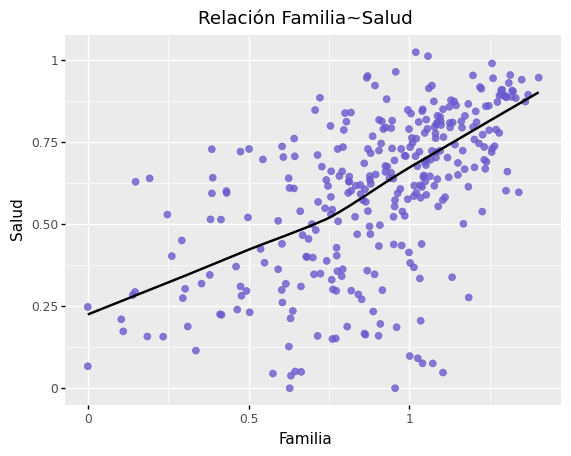

<ggplot: (120674711932)>

In [15]:
from plotnine import *
(

    ggplot(dfjoin_noNA) +

     geom_point(aes(x='Family', y = 'Health (Life Expectancy)'),
               color="slateblue",

               alpha=0.8,

               shape='o',

               size = 2.5,

               stroke = 0.3)

    + geom_smooth(

        aes(x='Family', y = 'Health (Life Expectancy)')

    )

    + labs(title='Relación Familia~Salud',

         x = 'Familia',

         y = 'Salud')

)

# Se ha introducido un relleno por regiones para mostrar las diferencias entre ellas

9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).


c:\Users\mario\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


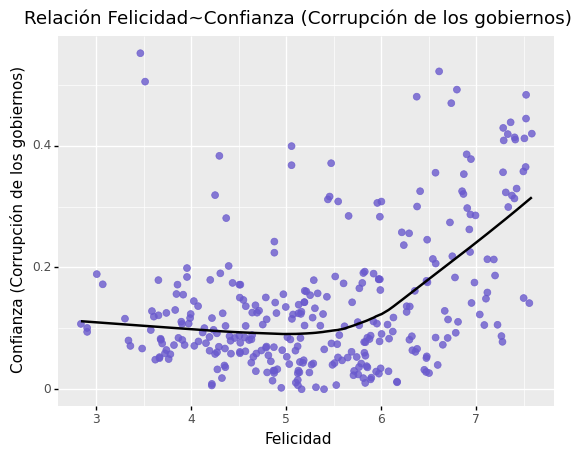

<ggplot: (120675943491)>

In [16]:
(

    ggplot(dfjoin_noNA) +

     geom_point(aes(x='Happiness Score', y = 'Trust (Government Corruption)'),
                color = "slateblue",

               alpha=0.8,

               shape='o',

               size = 2.5,

               stroke = 0.3)

    + geom_smooth(

        aes(x='Happiness Score', y = 'Trust (Government Corruption)')

    )

    + labs(title='Relación Felicidad~Confianza (Corrupción de los gobiernos)',

         x = 'Felicidad',

         y = 'Confianza (Corrupción de los gobiernos)')

)

10. Muestra la matriz de correlación del daframe.

<AxesSubplot:>

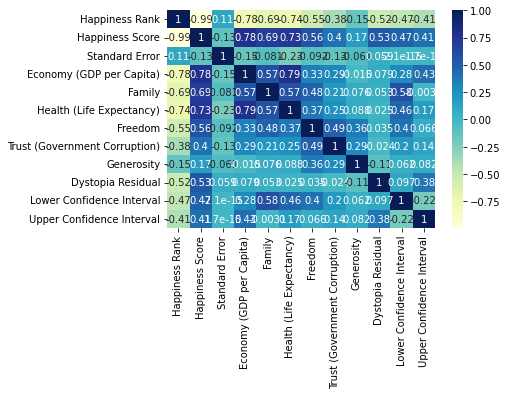

In [17]:
import seaborn as sns
sns.heatmap(dfjoin_noNA.corr(), cmap="YlGnBu", annot=True)

11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [18]:
bycountries = dfjoin_noNA.groupby(["Country"]).mean().copy()

In [19]:
# Una vez se agrupa el dataframe por países (y se realiza una copia del original), se ordena éste último por la puntuación de felicidad.
byhappiness= bycountries.sort_values("Happiness Score", ascending=False)
byhappiness

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,
Switzerland,1.5,7.5480,0.040997,1.461920,1.247375,0.902230,0.625570,0.415905,0.288805,2.606005,7.24409,5.403908
Iceland,2.5,7.5310,0.048362,1.364490,1.292745,0.907585,0.597505,0.145600,0.456540,2.766690,7.19659,5.443408
Denmark,2.0,7.5265,0.040582,1.383630,1.262160,0.834840,0.614395,0.464050,0.351550,2.615715,7.26009,5.404908
Norway,4.0,7.5100,0.043342,1.518220,1.228925,0.840500,0.632910,0.361395,0.362970,2.564980,7.24059,5.396408
Canada,5.5,7.4155,0.041707,1.383220,1.209355,0.866615,0.603335,0.321430,0.453225,2.578305,7.19759,5.345408
...,...,...,...,...,...,...,...,...,...,...,...,...
Afghanistan,153.5,3.4675,0.039362,0.351045,0.206610,0.238395,0.199220,0.084155,0.338890,2.048840,5.17409,3.324908
Benin,154.0,3.4120,0.042222,0.340820,0.229025,0.264690,0.440985,0.073455,0.192200,1.870700,5.23209,3.390908
Togo,156.5,3.0710,0.057577,0.244955,0.069975,0.266270,0.355655,0.111590,0.170990,1.851330,5.12609,3.315908


12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

c:\Users\mario\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


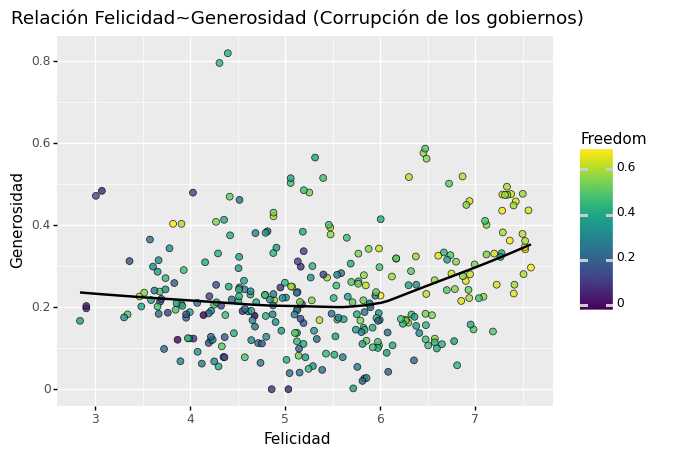

<ggplot: (120676281426)>

In [20]:
(

    ggplot(dfjoin_noNA) +

     geom_point(aes(x='Happiness Score', y = 'Generosity', fill = 'Freedom'),

               alpha=0.8,

               shape='o',

               size = 2.5,

               stroke = 0.3)

    + geom_smooth(

        aes(x='Happiness Score', y = 'Generosity')

    )

    + labs(title='Relación Felicidad~Generosidad (Corrupción de los gobiernos)',

         x = 'Felicidad',

         y = 'Generosidad')

)

Como se puede apreciar, la felicidad no se relaciona con la generosidad debido a que la nube de puntos demuestra que a mayot generosidad no existe una correlación con mayor felicidad. En cambio, a mayor libertad sí se puede apreciar una mayor felicidad.

13. Muestra la distribución del grado de distopía en función de la región.

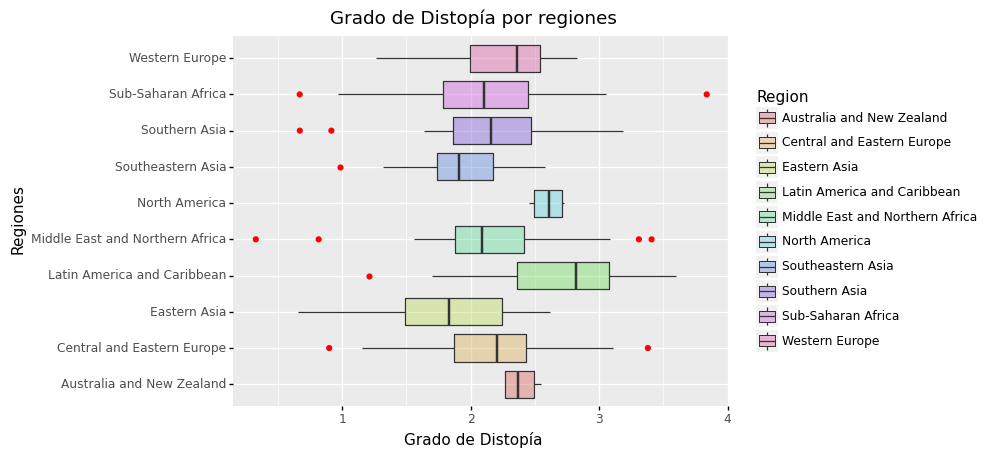

<ggplot: (120676341300)>

In [21]:
(
    ggplot(dfjoin_noNA) 
    + geom_boxplot(
        aes(x='Region', y="Dystopia Residual", fill = 'Region'),  
        alpha=0.4, 
        outlier_alpha = 1, 
        outlier_color ='red'
     )
    + labs(title='Grado de Distopía por regiones', 
         x = 'Regiones',
         y = 'Grado de Distopía',
         color = 'Regiones')
    + coord_flip()
)

